In [1]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding,Activation
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
#importing the sentences
with open('doccuments.txt', 'r') as f:
 reviews = f.read()

In [3]:
#lowercased the sentences
reviews = reviews.lower()
print(reviews)

layin n bed with a headache  ughhhh... waitin on your call...
funeral ceremony... gloomy friday...
i should be sleep, but im not! thinking about an old friend who i want. but he's married now. damn, &amp; he wants me 2! scandalous!"
charlene my love. i miss you
i'm sorry  at least it's friday?
ugh! i have to beat this stupid song to get to the next  rude!
if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol
the storm is here and the electricity is gone
so sleepy again and it's not even that late. i fail once again.
how are you convinced that i have always wanted you? what signals did i give off...damn i think i just lost another friend
i'm sorry people are so rude to you, isaac, they should get some manners and know better than to be so lewd!"
fudge.... just bs'd that whole paper.... so tired.... ugh i hate school.....  time to sleep!!!!!!!!!!!
i'm having a problem with my photo here in twitter amf!!!...can't se

In [4]:
#removing the punctuations
from string import punctuation

for c in string.punctuation:
 reviews= reviews.replace(c,"")



In [5]:
print(reviews)

layin n bed with a headache  ughhhh waitin on your call
funeral ceremony gloomy friday
i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me 2 scandalous
charlene my love i miss you
im sorry  at least its friday
ugh i have to beat this stupid song to get to the next  rude
if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol
the storm is here and the electricity is gone
so sleepy again and its not even that late i fail once again
how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend
im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd
fudge just bsd that whole paper so tired ugh i hate school  time to sleep
im having a problem with my photo here in twitter amfcant see my face
so sad its not available in the us thatd be awesome
i want to buy th

In [6]:
#splitting the sentences
reviews_split = reviews.split("\n")
print(reviews_split)

['layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me 2 scandalous', 'charlene my love i miss you', 'im sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'im having a problem with my photo here in twitter amfcant see my face', 'so sad its not available in

In [7]:
#importing the categories
with open('categories.txt', 'r') as f:
 labels = f.read()

In [8]:
labels = labels.lower()

In [9]:
labels_split = labels.split("\n")
print(labels_split)

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad'

In [10]:
print(len(reviews_split))

1366


In [11]:
print(len(labels_split))

1366


In [12]:
#tokenizing the categories
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in reviews_split]

In [13]:
import nltk
#nltk.download('stopwords')

In [14]:
#removing the stop words
from nltk.corpus import stopwords
from string import digits
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
def removeDigit(tokens):
    return [word for word in tokens if word not in digits]
filtered_words = [removeStopWords(sen) for sen in tokens]
filtered_words = [removeDigit(sen) for sen in filtered_words]

In [15]:
#creating a dataframe
corpus_df = pd.DataFrame({'Document': reviews_split,
                          'tokens': filtered_words,
                          'Category': labels_split})
corpus_df = corpus_df[['Document','tokens', 'Category']]
corpus_df = corpus_df[1:]
corpus_df

,Document,tokens,Category
1,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]",sad
2,i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, hes, ...",sad
3,charlene my love i miss you,"[charlene, love, miss]",sad
4,im sorry at least its friday,"[im, sorry, least, friday]",sad
5,ugh i have to beat this stupid song to get to ...,"[ugh, beat, stupid, song, get, next, rude]",sad
...,...,...,...
1361,evil people hope they get what they deserve,"[evil, people, hope, get, deserve]",angry
1362,for one tiger killed due to poaching kill 10 l...,"[one, tiger, killed, due, poaching, kill, 10, ...",angry
1363,not the bloody chinese again,"[bloody, chinese]",angry
1364,this is a political kill,"[political, kill]",angry


In [16]:
sad = []
happy = []
surprised = []
angry = []
neutral = []
disgusting = []
for l in corpus_df.Category:
    if l == 'sad':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(1)
        disgusting.append(0)
    elif l == 'happy':
        happy.append(1)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'surprised':
        happy.append(0)
        surprised.append(1)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'angry':
        happy.append(0)
        surprised.append(0)
        angry.append(1)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'neutral':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(1)
        sad.append(0)
        disgusting.append(0)
    elif l == 'disgusting':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(1)

In [17]:
#adding new columns
corpus_df['happy']= happy
corpus_df['surprised']= surprised
corpus_df['angry']= angry
corpus_df['neutral']= neutral
corpus_df['sad']= sad
corpus_df['disgusting']= disgusting

In [18]:
#fianl dataframe
corpus_df.tail()

,Document,tokens,Category,happy,surprised,angry,neutral,sad,disgusting
1361,evil people hope they get what they deserve,"[evil, people, hope, get, deserve]",angry,0,0,1,0,0,0
1362,for one tiger killed due to poaching kill 10 l...,"[one, tiger, killed, due, poaching, kill, 10, ...",angry,0,0,1,0,0,0
1363,not the bloody chinese again,"[bloody, chinese]",angry,0,0,1,0,0,0
1364,this is a political kill,"[political, kill]",angry,0,0,1,0,0,0
1365,evil china,"[evil, china]",angry,0,0,1,0,0,0


In [19]:
print(corpus_df.loc[[1362]])

                                               Document  \
1362  for one tiger killed due to poaching kill 10 l...   

                                                 tokens Category  happy  \
1362  [one, tiger, killed, due, poaching, kill, 10, ...    angry      0   

      surprised  angry  neutral  sad  disgusting  
1362          0      1        0    0           0  


In [20]:
#splitting the dataset
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(corpus_df, test_size=0.10, random_state=42)
print("Train: ", len(data_train))
print("Test: ", len(data_test))


Train:  1228
Test:  137


In [21]:
# view data_train.head()
data_train.head()

,Document,tokens,Category,happy,surprised,angry,neutral,sad,disgusting
667,1960958745surpriseleia12lipstickmasala what he...,"[1960958745surpriseleia12lipstickmasala, chose...",surprised,0,1,0,0,0,0
600,1960168925surprisefxpoignartdevjavanet the sl...,"[1960168925surprisefxpoignartdevjavanet, slowe...",surprised,0,1,0,0,0,0
859,i hate when you cant sleep,"[hate, cant, sleep]",angry,0,0,1,0,0,0
860,right fuck the whole twitter silence experimen...,"[right, fuck, whole, twitter, silence, experim...",angry,0,0,1,0,0,0
1140,if yr nervous about farting in yoga just remem...,"[yr, nervous, farting, yoga, remember, could, ...",disgusting,0,0,0,0,0,1


In [22]:
# view data_test.head()
data_test.head()

,Document,tokens,Category,happy,surprised,angry,neutral,sad,disgusting
1086,is off to meet my folks after a whilegonna b a...,"[meet, folks, whilegonna, b, working, weekend]",neutral,0,0,0,1,0,0
932,when it was goodi must creat my presentation ...,"[goodi, must, creat, presentation, english, guys]",neutral,0,0,0,1,0,0
278,the flower have finally bloomed,"[flower, finally, bloomed]",happy,1,0,0,0,0,0
901,it was an app that changed your wallpaper to o...,"[app, changed, wallpaper, one, several, hundre...",angry,0,0,1,0,0,0
939,awww watching 18 yo britney on snl shes so you...,"[awww, watching, 18, yo, britney, snl, shes, y...",neutral,0,0,0,1,0,0


In [23]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

8750 words total, with a vocabulary size of 3818
Max sentence length is 30


In [24]:
#testing previous cleaning
# print(all_training_words)
TRAINING_VOCAB

['10',
 '100',
 '1000',
 '10000',
 '10mm',
 '10pm',
 '11',
 '1105',
 '11830',
 '1200',
 '1245am',
 '125',
 '130',
 '1300',
 '14',
 '140',
 '1500',
 '159',
 '16',
 '171',
 '1753599011surprisedestinyhope92hello',
 '1753599032surprisemalistackbradiewebbstack',
 '1753599052surprisecelinieeeohmyjooo',
 '1753601619surprisexmandamorrningg',
 '1753616773surprisesiobhianabiban',
 '1753631286surprisekarlgoddardcheers',
 '1753647248surpriseparisianchicmrbilliam',
 '1753664124surprisenotforthisworldomg',
 '1753681252surprisemuzikaficionadabunnyc',
 '1753681265surpriseprayteruniqueguitarist',
 '1753694783surpriseejcxtinchystryder',
 '1753710549surprisekevismcuriousmike',
 '1753711724surprisebrokenmasquesi',
 '1753712928surprisejinxiegdrrus',
 '1753713269surpriseindoguateninahatz94music',
 '1753714097surpriseskyhawkmatthewpattyb',
 '1753727917surprisewilliambroughamwilliamsharonwilliams',
 '1753742630surpriselavuarneme',
 '1753744744surprisedjfunkehome',
 '1753758780surpriseguittaraxxparasite',
 '17

In [25]:
all_test_words = [word for tokens in data_test['tokens'] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test['tokens']]
TEST_VOCAB = sorted(list(set(all_test_words)))
print('%s words total, with a vocabulary size of %s' % (len(all_test_words), len(TEST_VOCAB)))
print('Max sentence length is %s' % max(test_sentence_lengths))

971 words total, with a vocabulary size of 702
Max sentence length is 19


In [26]:
#loaded GoogleNews wordvector
word2vec = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [27]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [28]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [29]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [30]:
## tokenizing training and testing sequence
import keras
tokenizer =keras.preprocessing.text.Tokenizer(num_words=None,lower=True, char_level=False,)

tokenizer.fit_on_texts(data_train["tokens"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["tokens"].tolist())

testing_sequences = tokenizer.texts_to_sequences(data_test["tokens"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))


Found 3818 unique tokens.


In [31]:
training_sequences[0]


[1087, 1088, 17, 1089, 1090, 290, 2, 185]

In [32]:
train_cnn_data = keras.preprocessing.sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

test_cnn_data = keras.preprocessing.sequence.pad_sequences(testing_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [33]:
train_cnn_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1087, 1088,
         17, 1089, 1090,  290,    2,  185])

In [34]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(3819, 300)


In [35]:
test_sequences = tokenizer.texts_to_sequences(data_test["tokens"].tolist())
test_cnn_data = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [36]:
def clean_predictData(reviews):
    #clean tokenize and then turn into sequence 
    
    reviews = reviews.lower()
    #removing the punctuations
    from string import punctuation
    for c in string.punctuation:
        reviews= reviews.replace(c,"")
    reviews = reviews.split("\n")
    print('punctuation removed: ',reviews)
    
    #tokenizing the categories
    from nltk import word_tokenize
    tokens = [word_tokenize(sen) for sen in reviews]
    print('tokens: ', tokens)
    import nltk
    nltk.download('stopwords')
    #removing the stop words
    from nltk.corpus import stopwords
    from string import digits
    stoplist = stopwords.words('english')
#     def removeStopWords(tokens): 
#     return [word for word in tokens if word not in stoplist]
#     def removeDigit(tokens):
#     return [word for word in tokens if word not in digits]
#     removeStopWords = [word for word in tokens if word not in stoplist]
#     removeDigit = [word for word in tokens if word not in digits]
    filtered_words = [removeStopWords(sen) for sen in tokens]
    filtered_words = [removeDigit(sen) for sen in filtered_words]
    
    corpus_df = pd.DataFrame({'tokens': filtered_words})
    data_train = corpus_df
    import keras
    tokenizer =keras.preprocessing.text.Tokenizer(num_words=None,lower=True, char_level=False,)
    tokenizer.fit_on_texts(data_train["tokens"].tolist())
    training_sequences = tokenizer.texts_to_sequences(data_train["tokens"].tolist())
    print('training_sequences: ', training_sequences)
    train_cnn_data = keras.preprocessing.sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('train_cnn_data: ', train_cnn_data)
    return train_cnn_data

In [37]:
clean_predictData("i am loving it, it is really good")

punctuation removed:  ['i am loving it it is really good']
tokens:  [['i', 'am', 'loving', 'it', 'it', 'is', 'really', 'good']]
training_sequences:  [[1, 2, 3]]
train_cnn_data:  [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 2 3]]


[nltk_data] Downloading package stopwords to C:\Users\Tech
[nltk_data]     Land\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 2, 3]])

In [38]:
label_names = ['sad', 'happy','surprised','angry','neutral','disgusting']
y_train = data_train[label_names].values
y_test = data_test[label_names].values


In [39]:
x_train = train_cnn_data
x_test = test_cnn_data
y_tr = y_train

In [40]:
x_train[9]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 8])

In [41]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding


In [42]:
model = Sequential()
model.add(Embedding(len(train_word_index)+1,
                                EMBEDDING_DIM,
                                weights=[train_embedding_weights],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False))
model.add(LSTM(1080, return_sequences=False, input_shape=(54, 30)))
model.add(Dropout(0.2))


model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
num_epochs = 200
batch_size = 34

In [44]:
label_names = ['sad', 'happy','surprised','angry','neutral','disgusting']
y_train = data_train[label_names].values

In [45]:
x_train = train_cnn_data
y_tr = y_train

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           1145700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1080)              5965920   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1080)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6486      
Total params: 7,118,106
Trainable params: 5,972,406
Non-trainable params: 1,145,700
_________________________________________________________________


In [47]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Train on 1105 samples, validate on 123 samples
Epoch 1/200
1105/1105 [==============================] - 9s 9ms/step - loss: 0.4555 - acc: 0.8285 - val_loss: 0.3917 - val_acc: 0.8482
Epoch 2/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.3492 - acc: 0.8582 - val_loss: 0.3447 - val_acc: 0.8442
Epoch 3/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.3025 - acc: 0.8750 - val_loss: 0.3022 - val_acc: 0.8767
Epoch 4/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.2625 - acc: 0.8956 - val_loss: 0.2926 - val_acc: 0.8808
Epoch 5/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.2392 - acc: 0.9029 - val_loss: 0.2708 - val_acc: 0.8970
Epoch 6/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.2133 - acc: 0.9107 - val_loss: 0.2688 - val_acc: 0.8875
Epoch 7/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.1954 - acc: 0.9205 - val_loss: 0.2649 - val_acc: 0.8889
Epoch 8/

Epoch 61/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0026 - acc: 0.9989 - val_loss: 0.6753 - val_acc: 0.8862
Epoch 62/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.7013 - val_acc: 0.8794
Epoch 63/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.7035 - val_acc: 0.8808
Epoch 64/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.7115 - val_acc: 0.8821
Epoch 65/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0023 - acc: 0.9989 - val_loss: 0.7387 - val_acc: 0.8794
Epoch 66/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0025 - acc: 0.9989 - val_loss: 0.7150 - val_acc: 0.8835
Epoch 67/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.7146 - val_acc: 0.8767
Epoch 68/200
1105/1105 [========================

1105/1105 [==============================] - 6s 5ms/step - loss: 0.0021 - acc: 0.9991 - val_loss: 0.5798 - val_acc: 0.8943
Epoch 122/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0023 - acc: 0.9986 - val_loss: 0.5942 - val_acc: 0.8943
Epoch 123/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0022 - acc: 0.9988 - val_loss: 0.5990 - val_acc: 0.8902
Epoch 124/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0021 - acc: 0.9986 - val_loss: 0.6041 - val_acc: 0.9011
Epoch 125/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0022 - acc: 0.9988 - val_loss: 0.6087 - val_acc: 0.8984
Epoch 126/200
1105/1105 [==============================] - 6s 5ms/step - loss: 0.0023 - acc: 0.9985 - val_loss: 0.6133 - val_acc: 0.8997
Epoch 127/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0019 - acc: 0.9986 - val_loss: 0.6182 - val_acc: 0.8957
Epoch 128/200
1105/1105 [==============================

Epoch 181/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0021 - acc: 0.9989 - val_loss: 0.7320 - val_acc: 0.8984
Epoch 182/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0017 - acc: 0.9992 - val_loss: 0.7398 - val_acc: 0.8902
Epoch 183/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0020 - acc: 0.9986 - val_loss: 0.7366 - val_acc: 0.8902
Epoch 184/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0017 - acc: 0.9989 - val_loss: 0.7353 - val_acc: 0.8957
Epoch 185/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0021 - acc: 0.9986 - val_loss: 0.7360 - val_acc: 0.8957
Epoch 186/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0016 - acc: 0.9989 - val_loss: 0.7393 - val_acc: 0.8970
Epoch 187/200
1105/1105 [==============================] - 5s 5ms/step - loss: 0.0018 - acc: 0.9988 - val_loss: 0.7436 - val_acc: 0.8984
Epoch 188/200
1105/1105 [================

In [48]:
# evaluate the model
scores = model.evaluate(x_train, y_tr, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.86%


In [49]:
# model.save('YOON_KIM_customModel.h5')
# model.load_weights('YoonKimWeights.h5')
# model.load( 'YOON_KIM_customModel.h5')
#Saving model and its weight

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk
acc: 80.17%


In [51]:
X_test = test_cnn_data
y_test = data_test[label_names].values
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)


137/137 [==============================] - 0s 2ms/step
Test score: 1.5199970555131452
Test accuracy: 0.8017031663525713


In [52]:
text = "what the fuck is this !!!"
text = clean_predictData(text)
# text = x_train[9]
print(text)
ans = model.predict(text)
# ans.index(max(ans))
print(np.argmax(ans))
label_names[np.argmax(ans)]

punctuation removed:  ['what the fuck is this ']
tokens:  [['what', 'the', 'fuck', 'is', 'this']]
training_sequences:  [[1]]
train_cnn_data:  [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


[nltk_data] Downloading package stopwords to C:\Users\Tech
[nltk_data]     Land\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4


'neutral'

In [53]:
# model.predict(X_test[0])
ahaa = X_test[0]
np.shape(ahaa)
# model.predict(X_test)
# X_test[0]
np.max([1,2,3,9])

9

In [54]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

137/137 [==============================] - 0s 895us/step


In [55]:
predictions[0]

array([3.2216311e-05, 4.2021275e-06, 2.7120113e-06, 4.9615502e-02,
       9.9068987e-01, 1.0728836e-06], dtype=float32)

In [56]:
submission_df = pd.DataFrame(columns=['Document'] + label_names)
submission_df['Document'] = data_test['Document'].values 
submission_df[label_names] = predictions
submission_df.to_csv("./cnn_submission.csv", index=False)

In [57]:

labels = ['sad', 'happy','surprised','angry','neutral','disgusting']

In [58]:

prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [59]:
sum(data_test.Category==prediction_labels)/len(prediction_labels)

0.36496350364963503

In [60]:
data_test.Category.value_counts()

surprised     39
happy         26
angry         25
neutral       24
sad           19
disgusting     4
Name: Category, dtype: int64

In [61]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

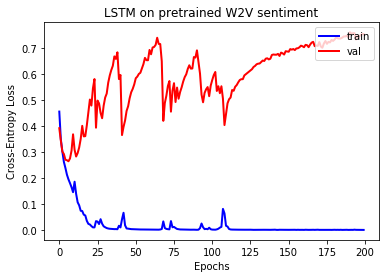

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM on pretrained W2V sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

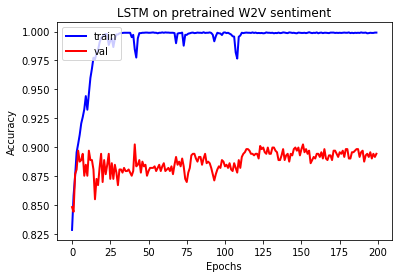

In [55]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('LSTM on pretrained W2V sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
